# Neural Network(by default HOD concat will run)

# Please select dataset and targetSet from commented code.Also please select input size depending on dataset

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               2432      
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_32 (Activation)   (None, 1)                 0         
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1265 samples, validate on 317 samples
Epoch 1/100
1265/1265 [==============================] - 0s 312us/step - loss: 0.6430 - acc: 0.6498 - val_loss: 0.6067 - val_acc: 0.7256
Epoch 2/100
1265/1265 [==============================] - 0s 13us/step - loss: 0.5965 - acc: 0.6933 - val_loss: 0.5655 - val_acc: 0.7760
Epoch 3/100
1265/1265 [==============================] - 0s 11us/step - loss: 0.5724 - acc: 0.7281 - val_loss: 0.5274 - val_acc: 0.8328
Epoch 4/100
1265/1265 [==============================] - 0s 17us/step - loss: 0.5249 - acc: 0.7700 - val_loss: 0.4959 - val_acc: 0.8265
Epoch 5/100
1265/1265 [==============================] - 0s 9us/step - loss: 0.4965 - acc: 0.7913 - val_loss: 0.4650 - val_acc: 0.8770
Epoch 6/100
1265/1265 [==============================] - 0s 11us/step - loss: 0.4621 - acc: 0.8166 - val_loss: 0.4378 - val_acc: 0.8580
Epoch 7/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.4377 - acc: 0.8332 - val_loss: 0.4124 - val_acc: 0.8770
E

1265/1265 [==============================] - 0s 11us/step - loss: 0.1568 - acc: 0.9518 - val_loss: 0.1466 - val_acc: 0.9558
Epoch 61/100
1265/1265 [==============================] - 0s 10us/step - loss: 0.1540 - acc: 0.9494 - val_loss: 0.1751 - val_acc: 0.9243
Epoch 62/100
1265/1265 [==============================] - 0s 9us/step - loss: 0.1510 - acc: 0.9518 - val_loss: 0.1417 - val_acc: 0.9527
Epoch 63/100
1265/1265 [==============================] - 0s 7us/step - loss: 0.1470 - acc: 0.9534 - val_loss: 0.1460 - val_acc: 0.9464
Epoch 64/100
1265/1265 [==============================] - 0s 8us/step - loss: 0.1409 - acc: 0.9549 - val_loss: 0.1422 - val_acc: 0.9527
Epoch 65/100
1265/1265 [==============================] - 0s 9us/step - loss: 0.1380 - acc: 0.9565 - val_loss: 0.1437 - val_acc: 0.9716
Epoch 66/100
1265/1265 [==============================] - 0s 9us/step - loss: 0.1520 - acc: 0.9526 - val_loss: 0.1428 - val_acc: 0.9495
Epoch 67/100
1265/1265 [==============================] - 0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13ccc56d8>,
      dtype=object)

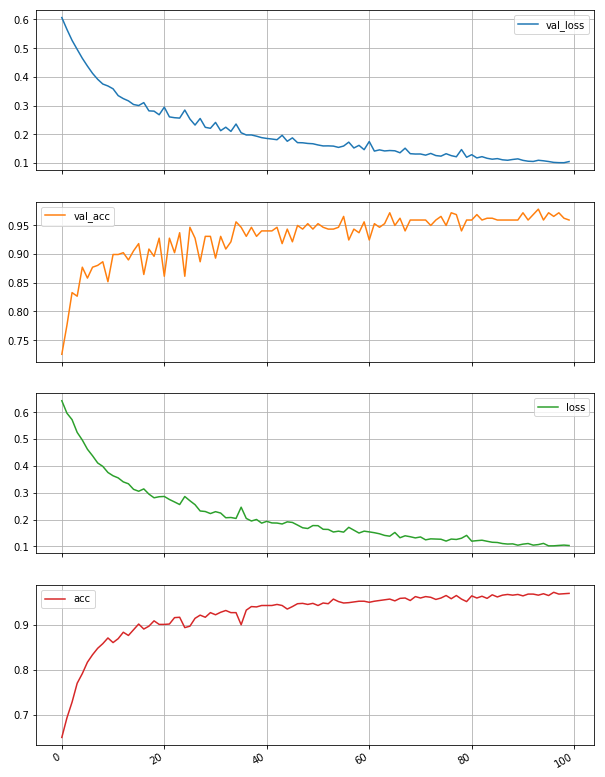

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot
from matplotlib import pyplot as plt

#take data set
 
dataSet = np.loadtxt("HODfeaturesConcat.csv", delimiter=",")
targetSet = np.loadtxt("HODtargetConcat.csv", delimiter=",")

# dataSet = np.loadtxt("HODfeaturesSub.csv", delimiter=",")
# targetSet = np.loadtxt("HODtargetSub.csv", delimiter=",")

# dataSet = np.loadtxt("GSCfeaturesSub.csv", delimiter=",")
# targetSet = np.loadtxt("GSCtargetSub.csv", delimiter=",")

# dataSet = np.loadtxt("GSCfeaturesConcat.csv", delimiter=",")
# targetSet = np.loadtxt("GSCtargetConcat.csv", delimiter=",")

X = dataSet
Y = targetSet

#split dataset
 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.20)
#concat gsc
#inputSize = 1024
#sub gsc
# inputSize = 512
#sub hod
# inputSize = 9
#concat hod
inputSize = 18

drop_out = 0.3

#setting network parameters to model
first_dense_layer_nodes = 128
second_dense_layer_nodes = 64
final_dense_layer_nodes = 1
validation_data_split = 0.2
#for hod sub
# num_epochs = 400
#for others
num_epochs = 100
model_batch_size = 512
tb_batch_size = 128
early_patience = 100

model = Sequential()
model.add(Dense(first_dense_layer_nodes, input_dim=inputSize))
model.add(Activation('relu'))
 
model.add(Dropout(drop_out))
 
model.add(Dense(final_dense_layer_nodes))

#using sigmoid activation function
model.add(Activation('sigmoid'))
 
model.summary()
model.compile(optimizer='Adadelta', loss='binary_crossentropy', metrics=['accuracy'])
 
#using tensor board for logs and draw graphs
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')
 
# Model Fitting
# model.fit(X, Y, validation_split=validation_data_split, epochs=num_epochs, batch_size=model_batch_size, callbacks = [tensorboard_cb,earlystopping_cb])
 
# model.fit(X, Y, epochs=10000, batch_size=model_batch_size,  verbose=2)
 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),validation_split=0.2, nb_epoch=num_epochs, batch_size=model_batch_size, callbacks = [tensorboard_cb,earlystopping_cb])
 
score = model.evaluate(X, Y, batch_size=model_batch_size)
 
print("Accuracy of model: %.2f%%"%(score[1]*100))
 
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))